# Quick Data Inspection

Simple notebook to take a quick look at the downloaded Deribit BTC data.

In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [2]:
# Define data paths
options_path = Path('../raw/options/feather/deribit/BTC')
spot_path = Path('../raw/spot/feather/binance/BTCUSDT')

print("=== DATA OVERVIEW ===")

print("\n--- OPTIONS ---")

if not options_path.exists():
    print("No options data found")
else:
    files = sorted(list(options_path.glob('*.feather')))
    if not files:
        print("No options files found")
    else:
        print(f"Files: {len(files)} ({files[0].stem} to {files[-1].stem})")
        
        # Load a sample file from the middle
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        
        print(f"Sample file: {sample_file.name}")
        print(f"   Rows: {len(df):,}")
        print(f"   Columns: {list(df.columns)}")
        
        if 'timestamp' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
            print(f"   Time range: {df['datetime'].min()} to {df['datetime'].max()}")
        
        if 'price' in df.columns:
            print(f"   Price range: {df['price'].min():.4f} - {df['price'].max():.4f}")
        
        if 'instrument' in df.columns:
            print(f"   Instruments: {df['instrument'].nunique()} unique")
            print(f"   Top 3: {df['instrument'].value_counts().head(3).index.tolist()}")

print("\n--- SPOT (KLINES) ---")

if not spot_path.exists():
    print("No spot data found")
else:
    files = sorted(list(spot_path.glob('*.feather')))
    if not files:
        print("No spot files found")
    else:
        print(f"Files: {len(files)} ({files[0].stem} to {files[-1].stem})")
        
        # Load a sample file from the middle
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        
        print(f"Sample file: {sample_file.name}")
        print(f"   Rows: {len(df):,}")
        print(f"   Columns: {list(df.columns)}")
        
        if 'timestamp' in df.columns:
            df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
            print(f"   Time range: {df['datetime'].min()} to {df['datetime'].max()}")
        
        if 'close' in df.columns:
            print(f"   Price range: {df['close'].min():.2f} - {df['close'].max():.2f}")
        
        if 'volume' in df.columns:
            print(f"   Volume range: {df['volume'].min():.4f} - {df['volume'].max():.4f} BTC")
            print(f"   Total volume: {df['volume'].sum():.2f} BTC")

=== DATA OVERVIEW ===

--- OPTIONS ---
Files: 2305 (2019-03-29 to 2025-07-19)
Sample file: 2022-05-24.feather
   Rows: 5,712
   Columns: ['timestamp', 'id', 'price', 'quantity', 'is_buyer_maker', 'instrument', 'iv', 'mark_price', 'index_price']
   Time range: 2022-05-24 00:00:26.276000+00:00 to 2022-05-24 23:56:50.966000+00:00
   Price range: 0.0001 - 0.4080
   Instruments: 235 unique
   Top 3: ['BTC-3JUN22-28000-P', 'BTC-25MAY22-30000-C', 'BTC-25MAY22-28000-P']

--- SPOT (KLINES) ---
Files: 2305 (2019-03-30 to 2025-07-20)
Sample file: 2022-05-25.feather
   Rows: 24
   Columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'quote_volume', 'trades_count', 'taker_buy_volume', 'taker_buy_quote_volume']
   Time range: 2022-05-25 00:00:00+00:00 to 2022-05-25 23:00:00+00:00
   Price range: 29409.01 - 30198.09
   Volume range: 805.0032 - 7069.8170 BTC
   Total volume: 59537.39 BTC


In [3]:
# Load and display sample data
print("=== SAMPLE DATA ===")

# OPTIONS DATA
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files:
        print("\n--- OPTIONS SAMPLE ---")
        
        # Load middle file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        print(f"\nFirst 10 rows from {sample_file.name}:")
        display(df.head(10))
        
        print(f"\nBasic statistics:")
        numeric_cols = ['price', 'quantity', 'iv', 'mark_price', 'index_price']
        available_cols = [col for col in numeric_cols if col in df.columns]
        if available_cols:
            display(df[available_cols].describe())

# SPOT DATA  
if spot_path.exists():
    files = sorted(list(spot_path.glob('*.feather')))
    if files:
        print("\n--- SPOT SAMPLE ---")
        
        # Load middle file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        print(f"\nFirst 10 rows from {sample_file.name}:")
        display(df.head(10))
        
        print(f"\nBasic statistics:")
        numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'quote_volume', 'trades_count']
        available_cols = [col for col in numeric_cols if col in df.columns]
        if available_cols:
            display(df[available_cols].describe())

=== SAMPLE DATA ===

--- OPTIONS SAMPLE ---

First 10 rows from 2022-05-24.feather:


,timestamp,id,price,quantity,is_buyer_maker,instrument,iv,mark_price,index_price,datetime
0,1653350426276000,215456610,0.0335,0.3,True,BTC-24JUN22-33000-C,67.34,0.033720,29086.23,2022-05-24 00:00:26.276000+00:00
1,1653350426310000,215456611,0.0335,0.1,True,BTC-24JUN22-33000-C,67.34,0.033720,29086.23,2022-05-24 00:00:26.310000+00:00
2,1653350541455000,215456714,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.455000+00:00
3,1653350541542000,215456715,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.542000+00:00
4,1653350541583000,215456716,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.583000+00:00
5,1653350541633000,215456718,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.633000+00:00
6,1653350541770000,215456719,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.770000+00:00
7,1653350541805000,215456720,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.805000+00:00
8,1653350541842000,215456721,0.0050,0.1,False,BTC-24JUN22-42000-C,74.17,0.005134,29120.84,2022-05-24 00:02:21.842000+00:00
9,1653350543628000,215456723,0.0050,0.1,False,BTC-24JUN22-42000-C,74.22,0.005116,29111.20,2022-05-24 00:02:23.628000+00:00



Basic statistics:


,price,quantity,iv,mark_price,index_price
count,5712.000000,5712.000000,5712.000000,5712.000000,5712.000000
mean,0.026167,2.700630,76.966714,0.026176,29223.117201
std,0.034115,20.755429,15.137753,0.033971,202.149349
min,0.000100,0.100000,0.000000,0.000000,28646.330000
25%,0.004500,0.100000,67.680000,0.004942,29132.802500
50%,0.015500,0.200000,71.980000,0.015552,29243.260000
75%,0.032500,1.100000,83.012500,0.031842,29336.787500
max,0.408000,1000.000000,500.000000,0.408068,29796.840000



--- SPOT SAMPLE ---

First 10 rows from 2022-05-25.feather:


,timestamp,open,high,low,close,volume,quote_volume,trades_count,taker_buy_volume,taker_buy_quote_volume,datetime
0,1653436800000000,29654.58,29688.92,29557.36,29625.21,1237.37556,3.664009e+07,23460,546.42464,1.618152e+07,2022-05-25 00:00:00+00:00
1,1653440400000000,29625.20,29803.22,29573.04,29789.69,1121.74731,3.329869e+07,23537,618.80121,1.837488e+07,2022-05-25 01:00:00+00:00
2,1653444000000000,29789.69,30180.85,29734.07,30114.78,3774.15671,1.132420e+08,54692,2088.38934,6.266357e+07,2022-05-25 02:00:00+00:00
3,1653447600000000,30114.78,30222.87,30069.59,30198.09,2026.12239,6.108792e+07,39201,1018.05740,3.069621e+07,2022-05-25 03:00:00+00:00
4,1653451200000000,30198.09,30223.74,30068.65,30103.44,1949.18985,5.871373e+07,39550,1001.45933,3.016740e+07,2022-05-25 04:00:00+00:00
5,1653454800000000,30103.43,30140.01,29844.36,29869.25,2006.90412,6.017602e+07,37674,788.85357,2.366599e+07,2022-05-25 05:00:00+00:00
6,1653458400000000,29869.25,29913.81,29666.67,29807.98,2596.36781,7.732202e+07,41240,1424.24347,4.241513e+07,2022-05-25 06:00:00+00:00
7,1653462000000000,29807.97,29851.02,29691.41,29701.46,1352.57768,4.026400e+07,23405,657.99067,1.958606e+07,2022-05-25 07:00:00+00:00
8,1653465600000000,29701.47,29941.41,29560.67,29821.03,2532.18696,7.534066e+07,38234,1249.21158,3.717861e+07,2022-05-25 08:00:00+00:00
9,1653469200000000,29821.04,29876.75,29685.26,29813.00,2011.16618,5.986015e+07,34503,956.73361,2.847490e+07,2022-05-25 09:00:00+00:00



Basic statistics:


,open,high,low,close,volume,quote_volume,trades_count
count,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000
mean,29770.318750,29895.758750,29632.639583,29765.632500,2480.724441,7.382117e+07,41060.000000
std,181.470472,162.921566,184.791299,185.983904,1479.779498,4.403097e+07,16843.302132
min,29409.010000,29625.000000,29294.210000,29409.010000,805.003150,2.398525e+07,23405.000000
25%,29648.272500,29799.177500,29539.327500,29628.322500,1502.747120,4.461955e+07,28225.000000
50%,29784.455000,29859.830000,29586.520000,29784.450000,2018.644285,6.063197e+07,38717.500000
75%,29822.027500,29950.282500,29702.075000,29822.017500,2698.207542,7.982458e+07,45500.250000
max,30198.090000,30223.740000,30069.590000,30198.090000,7069.816950,2.110029e+08,95027.000000


=== VISUALIZATIONS ===

--- OPTIONS DATA VISUALIZATION ---


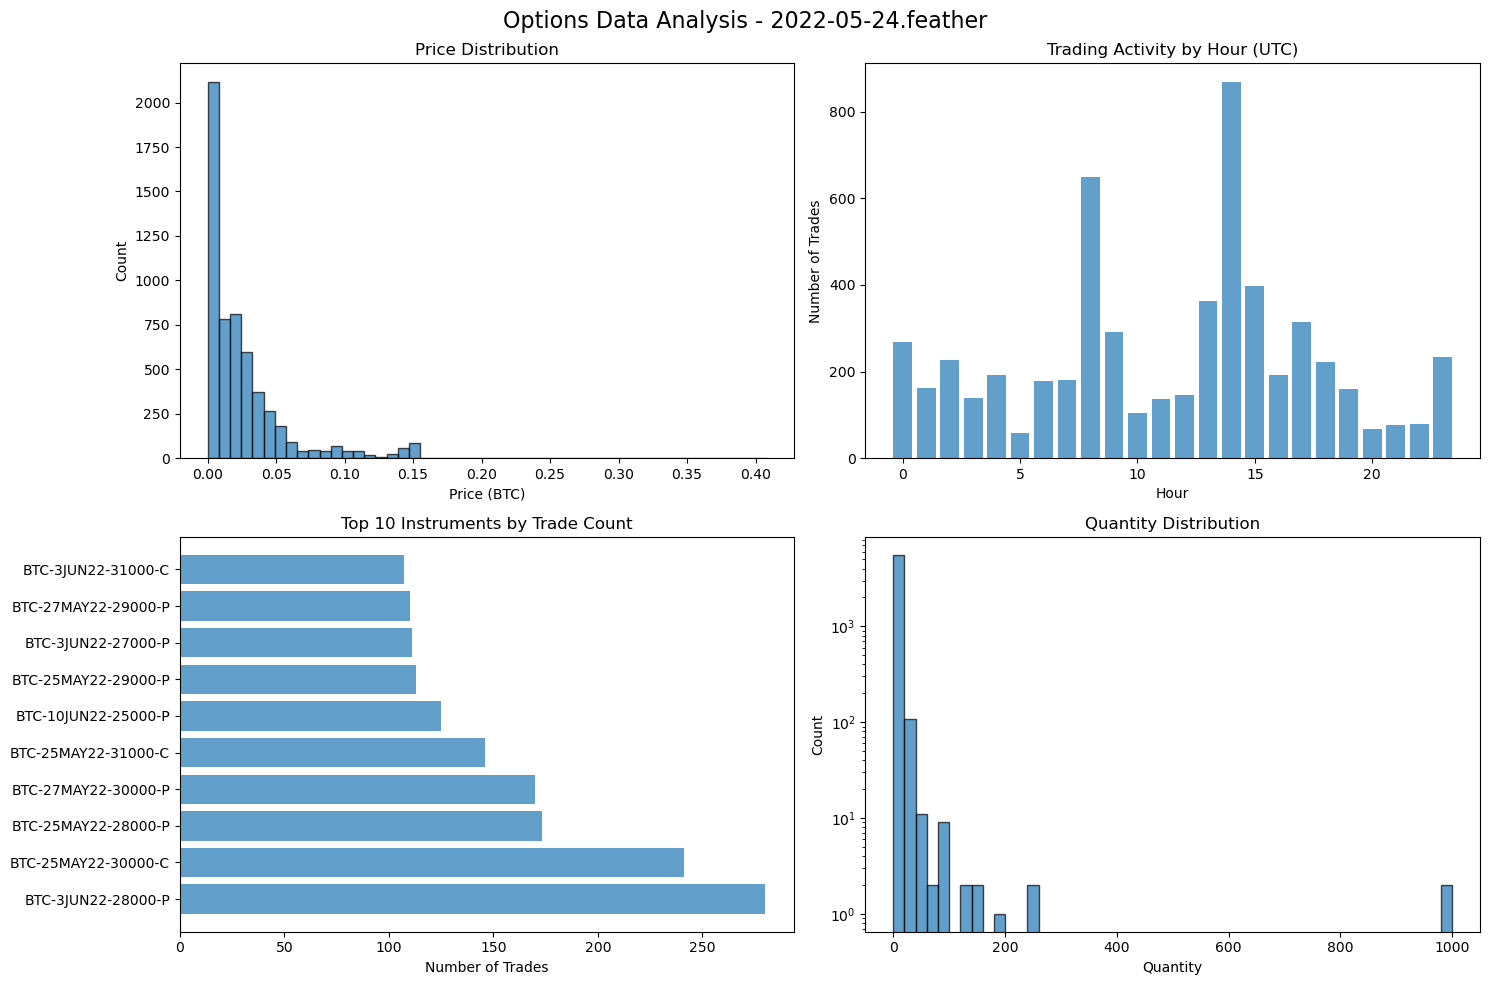

Sample from 2022-05-24.feather (5,712 trades)

--- SPOT DATA VISUALIZATION ---


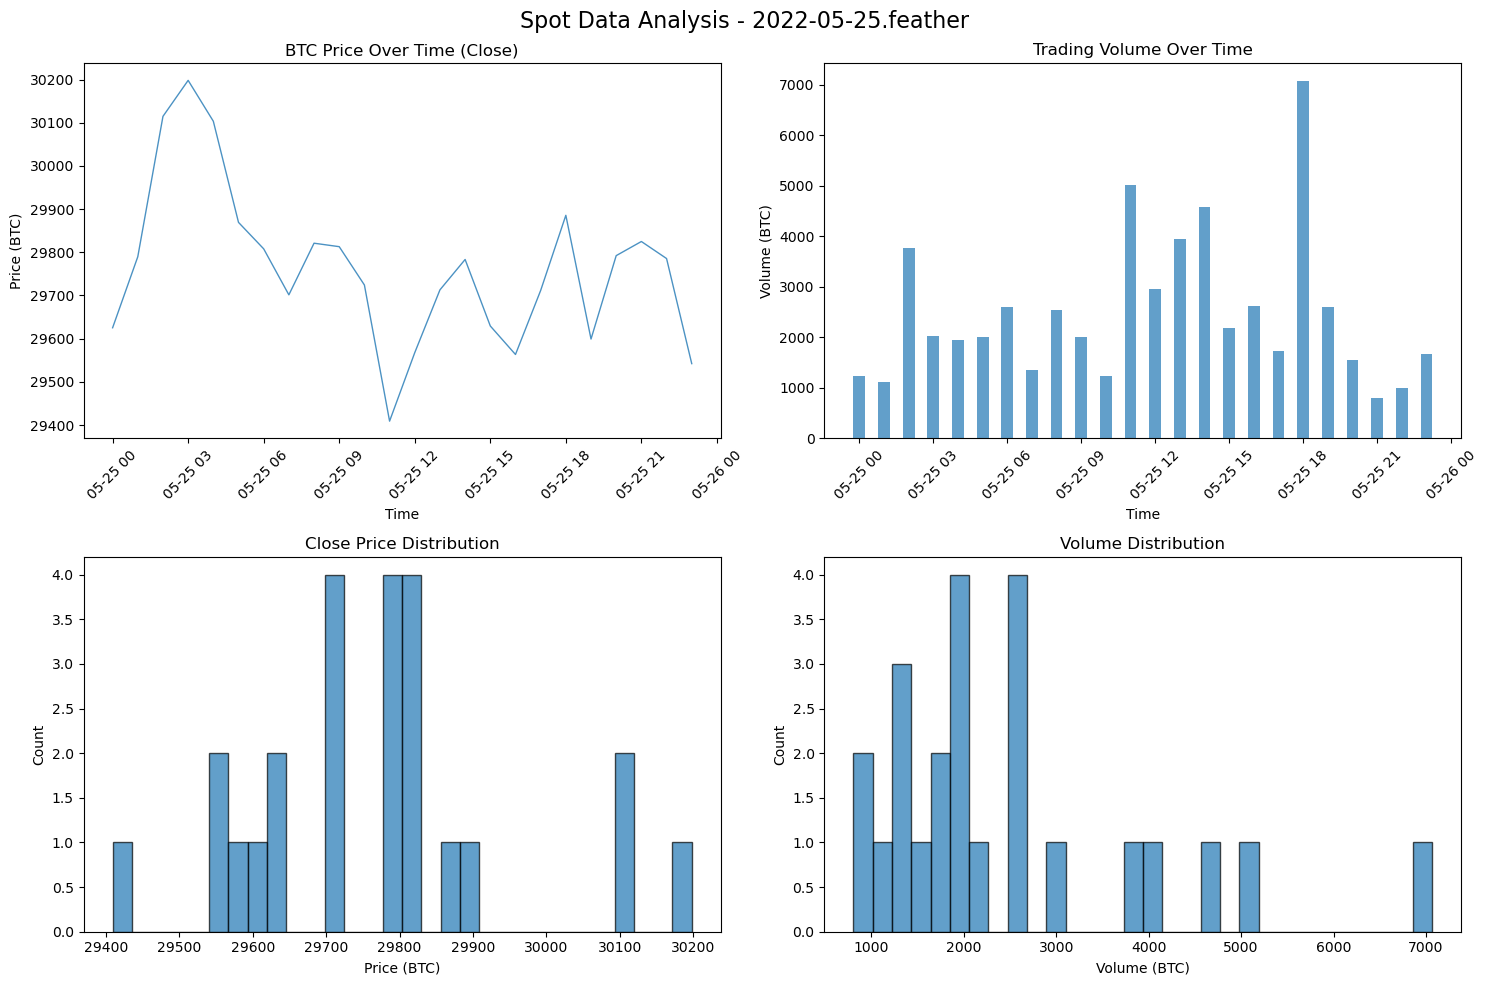

Sample from 2022-05-25.feather (24 klines)

Spot Data Insights:
   Price range: 29294.21 - 30223.74
   Average volume: 2480.72 BTC
   Total trades: 985,440
   Volatility (std of returns): 0.0058
   Max intraday range: 1.68%


In [4]:
# Simple visualization (if data exists)
print("=== VISUALIZATIONS ===")

# OPTIONS VISUALIZATION
if options_path.exists():
    files = sorted(list(options_path.glob('*.feather')))
    if files and len(files) > 0:
        print("\n--- OPTIONS DATA VISUALIZATION ---")
        
        # Load sample file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        # Create simple plots for options
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Options Data Analysis - {sample_file.name}', fontsize=16)
        
        # Price distribution
        ax1.hist(df['price'], bins=50, alpha=0.7, edgecolor='black')
        ax1.set_title('Price Distribution')
        ax1.set_xlabel('Price (BTC)')
        ax1.set_ylabel('Count')
        
        # Trading activity over time
        df['hour'] = df['datetime'].dt.hour
        hourly_counts = df['hour'].value_counts().sort_index()
        ax2.bar(hourly_counts.index, hourly_counts.values, alpha=0.7)
        ax2.set_title('Trading Activity by Hour (UTC)')
        ax2.set_xlabel('Hour')
        ax2.set_ylabel('Number of Trades')
        
        # Top instruments
        top_instruments = df['instrument'].value_counts().head(10)
        ax3.barh(range(len(top_instruments)), top_instruments.values, alpha=0.7)
        ax3.set_yticks(range(len(top_instruments)))
        ax3.set_yticklabels(top_instruments.index)
        ax3.set_title('Top 10 Instruments by Trade Count')
        ax3.set_xlabel('Number of Trades')
        
        # Quantity distribution
        ax4.hist(df['quantity'], bins=50, alpha=0.7, edgecolor='black')
        ax4.set_title('Quantity Distribution')
        ax4.set_xlabel('Quantity')
        ax4.set_ylabel('Count')
        ax4.set_yscale('log')  # Log scale for better visibility
        
        plt.tight_layout()
        plt.show()
        
        print(f"Sample from {sample_file.name} ({len(df):,} trades)")

# SPOT VISUALIZATION
if spot_path.exists():
    files = sorted(list(spot_path.glob('*.feather')))
    if files and len(files) > 0:
        print("\n--- SPOT DATA VISUALIZATION ---")
        
        # Load sample file
        sample_file = files[len(files)//2]
        df = pd.read_feather(sample_file)
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='us', utc=True)
        
        # Create plots for spot data
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'Spot Data Analysis - {sample_file.name}', fontsize=16)
        
        # OHLC Chart (simplified - just close prices over time)
        ax1.plot(df['datetime'], df['close'], linewidth=1, alpha=0.8)
        ax1.set_title('BTC Price Over Time (Close)')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Price (BTC)')
        ax1.tick_params(axis='x', rotation=45)
        
        # Volume over time
        ax2.bar(df['datetime'], df['volume'], alpha=0.7, width=0.02)
        ax2.set_title('Trading Volume Over Time')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Volume (BTC)')
        ax2.tick_params(axis='x', rotation=45)
        
        # Price distribution (close prices)
        ax3.hist(df['close'], bins=30, alpha=0.7, edgecolor='black')
        ax3.set_title('Close Price Distribution')
        ax3.set_xlabel('Price (BTC)')
        ax3.set_ylabel('Count')
        
        # Volume distribution
        ax4.hist(df['volume'], bins=30, alpha=0.7, edgecolor='black')
        ax4.set_title('Volume Distribution')
        ax4.set_xlabel('Volume (BTC)')
        ax4.set_ylabel('Count')
        
        plt.tight_layout()
        plt.show()
        
        print(f"Sample from {sample_file.name} ({len(df):,} klines)")
        
        # Additional spot data insights
        print(f"\nSpot Data Insights:")
        print(f"   Price range: {df['low'].min():.2f} - {df['high'].max():.2f}")
        print(f"   Average volume: {df['volume'].mean():.2f} BTC")
        print(f"   Total trades: {df['trades_count'].sum():,}")
        
        # Calculate basic returns
        df['returns'] = df['close'].pct_change()
        print(f"   Volatility (std of returns): {df['returns'].std():.4f}")
        print(f"   Max intraday range: {((df['high'] - df['low']) / df['open']).max():.2%}")

In [7]:
spot = Path('../parsed/spot/BTCUSDT_1h.feather')

df = pd.read_feather(spot)

print(df.head())

                   datetime         timestamp     open     high      low  \
0 2019-03-30 00:00:00+00:00  1553904000000000  4104.24  4140.00  4097.20   
1 2019-03-30 01:00:00+00:00  1553907600000000  4131.52  4133.97  4116.22   
2 2019-03-30 02:00:00+00:00  1553911200000000  4122.42  4127.89  4116.89   
3 2019-03-30 03:00:00+00:00  1553914800000000  4120.38  4122.00  4090.70   
4 2019-03-30 04:00:00+00:00  1553918400000000  4094.45  4095.01  4052.00   

     close       volume  quote_volume  trades_count  taker_buy_volume  \
0  4131.42  1630.871408  6.718339e+06         11252        933.864863   
1  4121.63   970.678892  4.003691e+06          7711        483.378771   
2  4119.86   718.305896  2.961068e+06          6151        399.924919   
3  4093.46  1846.363761  7.575378e+06         14225        961.383459   
4  4083.47  2470.736307  1.006017e+07         18192       1232.329448   

   taker_buy_quote_volume  
0            3.846974e+06  
1            1.993942e+06  
2            1.64867